In [1]:
# --- 1. Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import time

# --- 2. Load and Split the Dataset ---

# Load the preprocessed data
df = pd.read_csv('preprocessed_stress_level_dataset.csv')

# Define features (X) and target (y)
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Get feature names (as strings, since they are 0, 1, 2...)
feature_names = X.columns.tolist()

# Split the data: 80% training, 20% testing
# We use stratify=y to ensure the class distribution is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Original Dataset Shape: {df.shape}")
print(f"Features: {X.shape[1]}, Target: {y.name}")
print(f"Target classes: {np.unique(y)}")
print(f"Training Set Shape: {X_train.shape}, Test Set Shape: {X_test.shape}")

# Dictionary to store test accuracies for final comparison
model_accuracies = {}

Original Dataset Shape: (1100, 13)
Features: 12, Target: stress_level
Target classes: [0 1 2]
Training Set Shape: (880, 12), Test Set Shape: (220, 12)


--- Training Variation 1: Baseline Random Forest ---
Baseline Model Training Time: 0.38 seconds
Baseline Model Test Accuracy: 0.877273
Baseline Model Test AUC Score (OvR): 0.983009

Classification Report (Baseline):
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        74
           1       0.88      0.92      0.90        72
           2       0.88      0.88      0.88        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



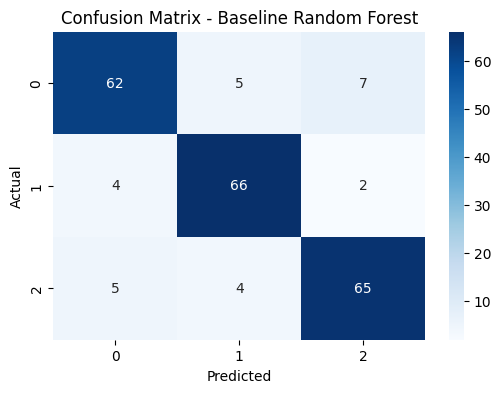

--------------------------------------------------



In [2]:
# --- 3. Model Variation 1: Baseline Random Forest (Default Parameters) ---
print("--- Training Variation 1: Baseline Random Forest ---")
start_time = time.time()

# Initialize the model with random_state for reproducibility
rf_base = RandomForestClassifier(random_state=42)

# Train the model
rf_base.fit(X_train, y_train)

# Make predictions
y_pred_base = rf_base.predict(X_test)
y_prob_base = rf_base.predict_proba(X_test)

# Evaluate the model
acc_base = accuracy_score(y_test, y_pred_base)
model_accuracies['Baseline (Defaults)'] = acc_base
auc_base = roc_auc_score(y_test, y_prob_base, multi_class='ovr')

print(f"Baseline Model Training Time: {time.time() - start_time:.2f} seconds")
print(f"Baseline Model Test Accuracy: {acc_base:.6f}")
print(f"Baseline Model Test AUC Score (OvR): {auc_base:.6f}")
print("\nClassification Report (Baseline):")
print(classification_report(y_test, y_pred_base))

# Plot Confusion Matrix
cm_base = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Baseline Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("--------------------------------------------------\n")

--- Training Variation 2: Manually Tuned (n_estimators=200, max_depth=20) ---
Manual Tune Model Training Time: 0.82 seconds
Manual Tune Model Test Accuracy: 0.881818
Manual Tune Model Test AUC Score (OvR): 0.982526

Classification Report (Manual Tune):
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        74
           1       0.89      0.92      0.90        72
           2       0.84      0.92      0.88        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



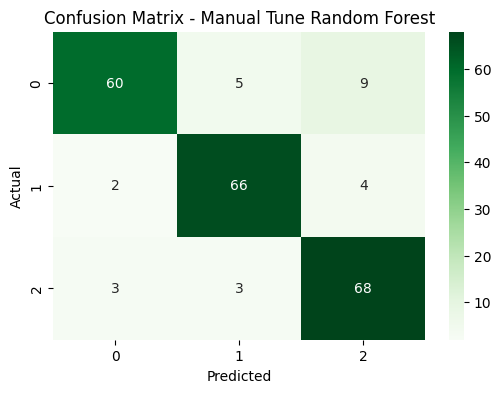

--------------------------------------------------



In [3]:
# --- 4. Model Variation 2: Manually Tuned (Deeper Trees) ---
print("--- Training Variation 2: Manually Tuned (n_estimators=200, max_depth=20) ---")
start_time = time.time()

# Initialize the model with more trees and a defined max depth
rf_manual = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)

# Train the model
rf_manual.fit(X_train, y_train)

# Make predictions
y_pred_manual = rf_manual.predict(X_test)
y_prob_manual = rf_manual.predict_proba(X_test)

# Evaluate the model
acc_manual = accuracy_score(y_test, y_pred_manual)
model_accuracies['Manual (n=200, depth=20)'] = acc_manual
auc_manual = roc_auc_score(y_test, y_prob_manual, multi_class='ovr')

print(f"Manual Tune Model Training Time: {time.time() - start_time:.2f} seconds")
print(f"Manual Tune Model Test Accuracy: {acc_manual:.6f}")
print(f"Manual Tune Model Test AUC Score (OvR): {auc_manual:.6f}")
print("\nClassification Report (Manual Tune):")
print(classification_report(y_test, y_pred_manual))

# Plot Confusion Matrix
cm_manual = confusion_matrix(y_test, y_pred_manual)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_manual, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Manual Tune Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("--------------------------------------------------\n")

--- Training Variation 3: GridSearchCV Tuned ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

GridSearchCV Training Time: 43.43 seconds
Best Parameters Found by GridSearchCV:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

GridSearchCV Tuned Model Test Accuracy: 0.859091
GridSearchCV Tuned Model Test AUC Score (OvR): 0.982605

Classification Report (GridSearchCV Tuned):
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        74
           1       0.85      0.92      0.88        72
           2       0.82      0.86      0.84        74

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



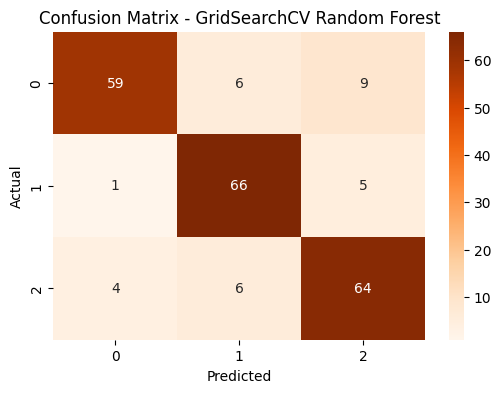

--------------------------------------------------



In [4]:
# --- 5. Model Variation 3: GridSearchCV Tuned Model ---
print("--- Training Variation 3: GridSearchCV Tuned ---")
start_time = time.time()

# Define the parameter grid to search
# This is a small grid to run relatively quickly.
param_grid = {
    'n_estimators': [100, 150],      # Number of trees
    'max_depth': [10, 20, None],     # Max depth of trees
    'min_samples_split': [2, 5],     # Min samples to split a node
    'min_samples_leaf': [1, 2]       # Min samples at a leaf node
}

# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print(f"\nGridSearchCV Training Time: {time.time() - start_time:.2f} seconds")

# Get the best model
best_rf = grid_search.best_estimator_
print(f"Best Parameters Found by GridSearchCV:\n{grid_search.best_params_}")

# Make predictions with the best model
y_pred_grid = best_rf.predict(X_test)
y_prob_grid = best_rf.predict_proba(X_test)

# Evaluate the best model
acc_grid = accuracy_score(y_test, y_pred_grid)
model_accuracies['GridSearchCV Tuned'] = acc_grid
auc_grid = roc_auc_score(y_test, y_prob_grid, multi_class='ovr')

print(f"\nGridSearchCV Tuned Model Test Accuracy: {acc_grid:.6f}")
print(f"GridSearchCV Tuned Model Test AUC Score (OvR): {auc_grid:.6f}")
print("\nClassification Report (GridSearchCV Tuned):")
print(classification_report(y_test, y_pred_grid))

# Plot Confusion Matrix
cm_grid = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_grid, annot=True, fmt='d', cmap='Oranges',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - GridSearchCV Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("--------------------------------------------------\n")


--- Final Model Accuracy Comparison ---
Manual (n=200, depth=20)    0.881818
Baseline (Defaults)         0.877273
GridSearchCV Tuned          0.859091
dtype: float64

--- Feature Importances (from Manual (n=200, depth=20) model) ---
   Feature  Importance
0        0    0.367037
1        1    0.340097
2        2    0.105060
4        4    0.027520
3        3    0.023596
9        9    0.022953
11      11    0.022877
7        7    0.019606
6        6    0.019439
5        5    0.018784


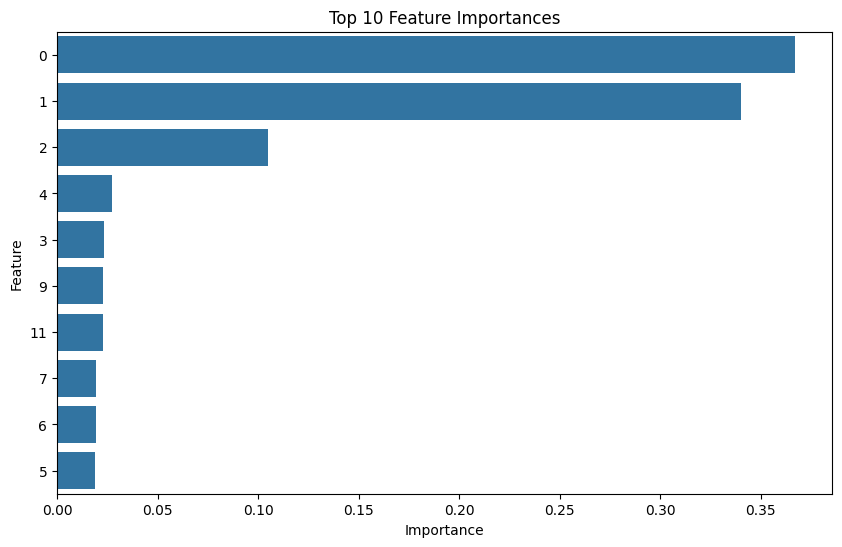

In [5]:
# --- 6. Final Comparison ---

# Print a summary of accuracies
print("\n--- Final Model Accuracy Comparison ---")
accuracy_series = pd.Series(model_accuracies).sort_values(ascending=False)
print(accuracy_series)

# Optional: Feature Importance from the best model
print(f"\n--- Feature Importances (from {accuracy_series.index[0]} model) ---")
# Get the best model (assuming GridSearchCV was best, otherwise change 'best_rf')
# You can change 'best_rf' to 'rf_base' or 'rf_manual' if one of them performed better
best_model_for_features = grid_search.best_estimator_

importances = best_model_for_features.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()